# Keras Classification 

In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

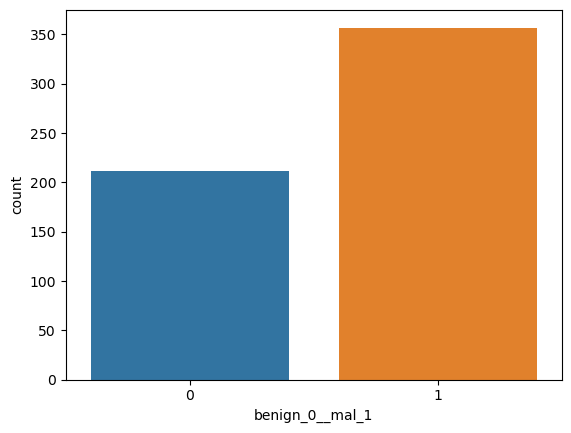

In [5]:
# count patient based on the cancer is benign or malignant
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

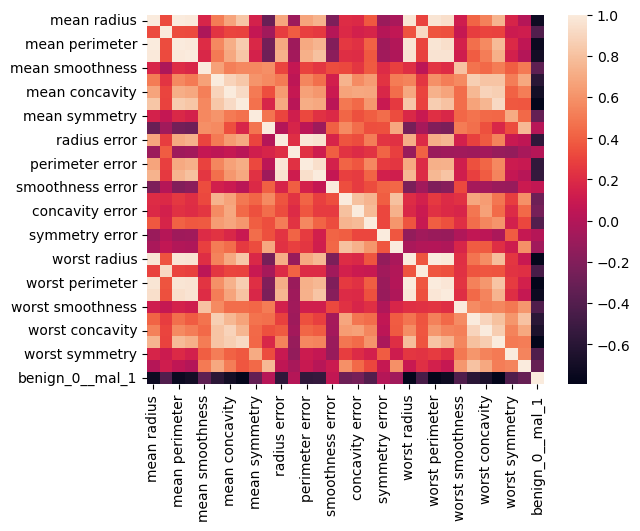

In [6]:
sns.heatmap(df.corr())

In [7]:
# most correlated to the diagnose
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

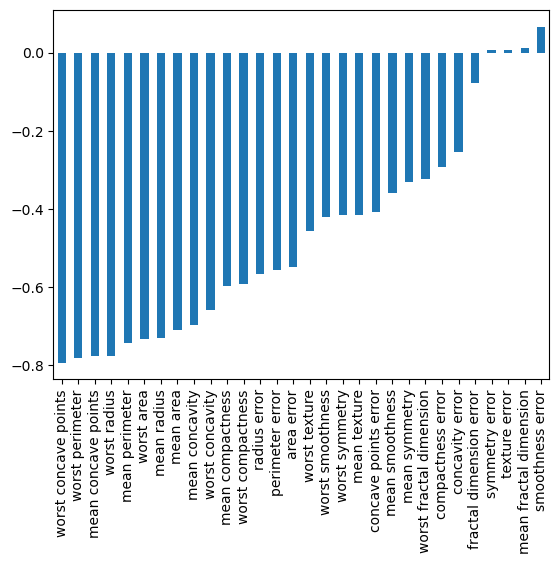

In [8]:
# show the correlation in plot diagram but the column 'benign_0__mal_1'
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [17]:
X_train.shape

(426, 30)

In [18]:
model = Sequential()

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

In [19]:
# Choosing too many epochs and overfitting
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.6899 - val_loss: 0.6658
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6532 - val_loss: 0.6343
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6182 - val_loss: 0.5929
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5678 - val_loss: 0.5397
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5324 - val_loss: 0.4821
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4512 - val_loss: 0.4236
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4022 - val_loss: 0.3678
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3589 - val_loss: 0.3269
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3258 - val_loss: 0.2890
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2728 - val_loss: 0.2621
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2716 - val_loss: 0.2384
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0775 - val_loss: 0.1104
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0645 - val_loss: 0.1136
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0547 - val_loss: 0.1165
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0581 - val_loss: 0.1111
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0635 - val_loss: 0.1108
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0557 - val_loss: 0.1200
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0644 - val_loss: 0.1158
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0607 - val_loss: 0.1148
Epoch 77/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0585 - val_loss: 0.1154
Epoch 78/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0546 - val_loss: 0.1191
Epoch 79/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - val_loss: 0.1226
Epoch 80/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0466 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0539 - val_loss: 0.1300
Epoch 138/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0464 - val_loss: 0.1286
Epoch 139/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - val_loss: 0.1279
Epoch 140/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0384 - val_loss: 0.1354
Epoch 141/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0569 - val_loss: 0.1308
Epoch 142/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0479 - val_loss: 0.1284
Epoch 143/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0439 - val_loss: 0.1328
Epoch 144/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0507 - val_loss: 0.1377
Epoch 145/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - val_loss: 0.1308
Epoch 146/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0385 - val_loss: 0.1328
Epoch 147/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0494 - val_loss: 0.1461
Epoch 148/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - val_loss: 0.1587
Epoch 205/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0573 - val_loss: 0.1394
Epoch 206/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0486 - val_loss: 0.1460
Epoch 207/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0440 - val_loss: 0.1592
Epoch 208/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0406 - val_loss: 0.1442
Epoch 209/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0438 - val_loss: 0.1460
Epoch 210/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0369 - val_loss: 0.1536
Epoch 211/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - val_loss: 0.1551
Epoch 212/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0352 - val_loss: 0.1482
Epoch 213/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0472 - val_loss: 0.1498
Epoch 214/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0466 - val_loss: 0.1495
Epoch 215/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0427 - val_loss: 0.1784
Epoch 272/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - val_loss: 0.1504
Epoch 273/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0420 - val_loss: 0.1609
Epoch 274/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0541 - val_loss: 0.1497
Epoch 275/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0401 - val_loss: 0.1549
Epoch 276/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0394 - val_loss: 0.1524
Epoch 277/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0325 - val_loss: 0.1704
Epoch 278/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0390 - val_loss: 0.1509
Epoch 279/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 - val_loss: 0.1597
Epoch 280/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0478 - val_loss: 0.1641
Epoch 281/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0428 - val_loss: 0.1584
Epoch 282/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0321 - val_loss: 0.1544
Epoch 339/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0347 - val_loss: 0.1832
Epoch 340/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0353 - val_loss: 0.1754
Epoch 341/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - val_loss: 0.1764
Epoch 342/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0350 - val_loss: 0.1795
Epoch 343/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0270 - val_loss: 0.1747
Epoch 344/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0274 - val_loss: 0.1783
Epoch 345/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0408 - val_loss: 0.1996
Epoch 346/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 - val_loss: 0.1755
Epoch 347/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0261 - val_loss: 0.1764
Epoch 348/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0307 - val_loss: 0.1691
Epoch 349/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - val_loss: 0.1946
Epoch 406/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0333 - val_loss: 0.1741
Epoch 407/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0233 - val_loss: 0.1818
Epoch 408/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0313 - val_loss: 0.1826
Epoch 409/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0299 - val_loss: 0.1885
Epoch 410/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0367 - val_loss: 0.1708
Epoch 411/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0394 - val_loss: 0.1791
Epoch 412/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - val_loss: 0.1694
Epoch 413/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - val_loss: 0.2244
Epoch 414/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0430 - val_loss: 0.1731
Epoch 415/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0360 - val_loss: 0.1875
Epoch 416/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - val_loss: 0.1893
Epoch 473/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0270 - val_loss: 0.1911
Epoch 474/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - val_loss: 0.1837
Epoch 475/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0204 - val_loss: 0.1989
Epoch 476/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0241 - val_loss: 0.1893
Epoch 477/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0224 - val_loss: 0.1944
Epoch 478/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0234 - val_loss: 0.1988
Epoch 479/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0302 - val_loss: 0.2031
Epoch 480/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0225 - val_loss: 0.1883
Epoch 481/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 - val_loss: 0.1795
Epoch 482/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0257 - val_loss: 0.2079
Epoch 483/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0208 - val_loss: 0.1769
Epoch 540/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - val_loss: 0.1902
Epoch 541/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0215 - val_loss: 0.2413
Epoch 542/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0336 - val_loss: 0.1859
Epoch 543/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - val_loss: 0.1978
Epoch 544/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0295 - val_loss: 0.1673
Epoch 545/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0271 - val_loss: 0.2081
Epoch 546/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0317 - val_loss: 0.2201
Epoch 547/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226 - val_loss: 0.1727
Epoch 548/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - val_loss: 0.2506
Epoch 549/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0366 - val_loss: 0.1982
Epoch 550/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - lo

In [20]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

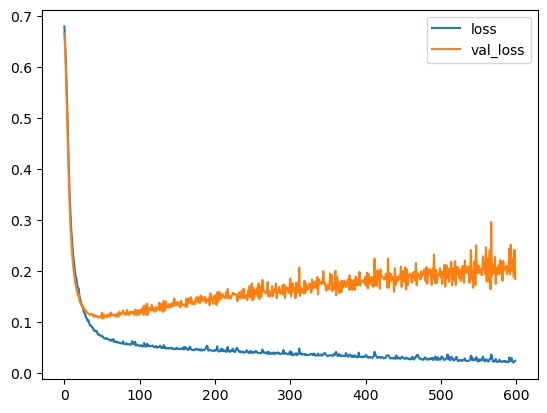

In [21]:
model_loss.plot()

In [22]:
# 1. solution: Early stopping
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [25]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.6967 - val_loss: 0.6758
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6675 - val_loss: 0.6541
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6450 - val_loss: 0.6266
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6161 - val_loss: 0.5923
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5789 - val_loss: 0.5473
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5387 - val_loss: 0.5005
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4992 - val_loss: 0.4548
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4367 - val_loss: 0.4092
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4035 - val_loss: 0.3688
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3624 - val_loss: 0.3304
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3116 - val_loss: 0.2993
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0681 - val_loss: 0.1162
Epoch 70/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0721 - val_loss: 0.1131
Epoch 71/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0677 - val_loss: 0.1109
Epoch 72/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0711 - val_loss: 0.1118
Epoch 73/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0524 - val_loss: 0.1187
Epoch 74/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0700 - val_loss: 0.1101
Epoch 75/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0529 - val_loss: 0.1151
Epoch 76/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0481 - val_loss: 0.1131
Epoch 76: early stopping


<AxesSubplot:>

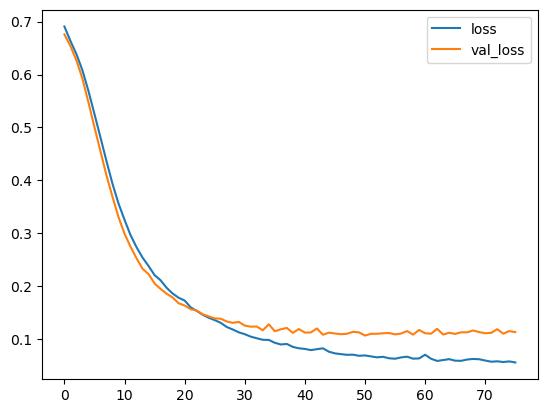

In [26]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [27]:
# 2. Solution: Adding in DropOut Layers
from tensorflow.keras.layers import Dropout

In [28]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.7147 - val_loss: 0.6879
Epoch 2/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7002 - val_loss: 0.6757
Epoch 3/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6817 - val_loss: 0.6646
Epoch 4/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6775 - val_loss: 0.6539
Epoch 5/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6495 - val_loss: 0.6405
Epoch 6/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6382 - val_loss: 0.6176
Epoch 7/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6272 - val_loss: 0.5910
Epoch 8/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6118 - val_loss: 0.5597
Epoch 9/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5939 - val_loss: 0.5287
Epoch 10/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5664 - val_loss: 0.4997
Epoch 11/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5529 - val_loss: 0.4735
Epoch 12/600
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

<AxesSubplot:>

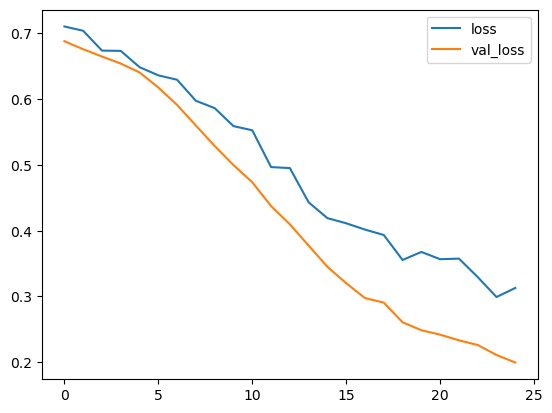

In [30]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [31]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [32]:
from sklearn.metrics import classification_report,confusion_matrix

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94        55
           1       0.98      0.94      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [34]:
print(confusion_matrix(y_test,predictions))

[[53  2]
 [ 5 83]]
